In [1]:
from src.knapsack.initialize_and_Train import Initialize_and_train
from src.knapsack.generate_knapsack_data import Gen_Knapsack_data
import numpy as np
import pickle as pkl

Auto-Sklearn cannot be imported.


In [2]:
models = ['DYS', 'BBOpt', 'PertOpt'] #'DYS-Regret', 'SPO+', 'BBOpt', 'PertOpt', 'PertOpt-FY']
item_values = np.arange(20,65,5)
num_repeats = 5
results_test_loss = np.zeros((len(models), len(item_values), num_repeats))
results_train_time = np.zeros((len(models), len(item_values), num_repeats))
results_time_till_val_loss = np.zeros((len(models), len(item_values), num_repeats))

data_type = "x" # ;x for fitting to solution, w for fitting to costs/values

# hard code some data parameters
num_knapsack = 2
num_feat = 5
num_data = 1100

# max values
max_epochs = 25
# max time hardcoded to 30 minutes.

In [3]:
for item_counter, num_item in enumerate(item_values):
    knapsack_data_dict = {'num_knapsack': num_knapsack,
                          'num_item': num_item,
                          'num_feat': num_feat,
                          'num_data': num_data
                         } 
    
    # Do the thing
    for repeat in range(num_repeats):
        # Generate Data
        knapsack_dict = Gen_Knapsack_data(num_data, num_feat, num_item, num_knapsack)
        for model_counter, model_type in enumerate(models):
            train_time, best_test_loss, time_till_best_test_loss = Initialize_and_train(knapsack_dict, knapsack_data_dict, model_type, data_type, max_epochs, device='mps')
            results_test_loss[model_counter, item_counter, repeat] = best_test_loss
            results_train_time[model_counter, item_counter, repeat] = train_time
            results_time_till_val_loss[model_counter, item_counter, repeat] = time_till_best_test_loss
    

Generating training data for knapsack problem with 2 knapsacks and 20 items
Restricted license - for non-production use only - expires 2024-10-28
Optimizing for optDataset...


100%|██████████| 900/900 [00:00<00:00, 960.25it/s]


Optimizing for optDataset...


100%|██████████| 100/100 [00:00<00:00, 769.23it/s]


Optimizing for optDataset...


100%|██████████| 100/100 [00:00<00:00, 795.99it/s]
/Users/danielmckenzie/My-Drive/Research/Fixed_Point_Networks/Diff-Opt-Over-Polytopes-Project/SPO_with_DYS/src/knapsack/dYS_opt_net.py:29: UserWarning: The operator 'aten::linalg_svd' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  U, s, VT = torch.linalg.svd(self.A, full_matrices=False)


Finished building dataset

 Currently training DYS

Initial validation loss is  0.4501650035381317
Best validation loss achieved at epoch 1
epoch:  1 validation loss is  0.12508250772953033 epoch time:  1.5205490589141846
Best validation loss achieved at epoch 2
epoch:  2 validation loss is  0.08217822015285492 epoch time:  1.421820878982544
epoch:  3 validation loss is  0.08547854423522949 epoch time:  1.3318161964416504
Best validation loss achieved at epoch 4
epoch:  4 validation loss is  0.07590758800506592 epoch time:  1.2908961772918701
Best validation loss achieved at epoch 5
epoch:  5 validation loss is  0.07491748780012131 epoch time:  1.3294978141784668
Best validation loss achieved at epoch 6
epoch:  6 validation loss is  0.07425742596387863 epoch time:  1.3557250499725342
epoch:  7 validation loss is  0.08052805811166763 epoch time:  1.3679349422454834
Best validation loss achieved at epoch 8
epoch:  8 validation loss is  0.0712871253490448 epoch time:  1.3518319129943848
e

KeyboardInterrupt: 

In [ ]:
## Prepare for plotting
results_test_loss_mean = np.mean(results_test_loss, axis=2)
results_test_loss_max = np.max(results_test_loss, axis=2)
results_test_loss_min = np.min(results_test_loss, axis=2)

In [ ]:
# Dump to CSV for plotting
plotting_dir = "./plot_data/"
for idx, model_type in enumerate(models):
    np.savetxt(plotting_dir + 'results_regret' + model_type+'mean.csv',np.column_stack([item_values, results_test_loss_mean[idx,:]]), delimiter="," )
    np.savetxt(plotting_dir + 'results_regret' + model_type+'min.csv',np.column_stack([item_values, results_test_loss_min[idx,:]]), delimiter="," )
    np.savetxt(plotting_dir + 'results_regret' + model_type+'max.csv',np.column_stack([item_values, results_test_loss_max[idx,:]]), delimiter="," )
        

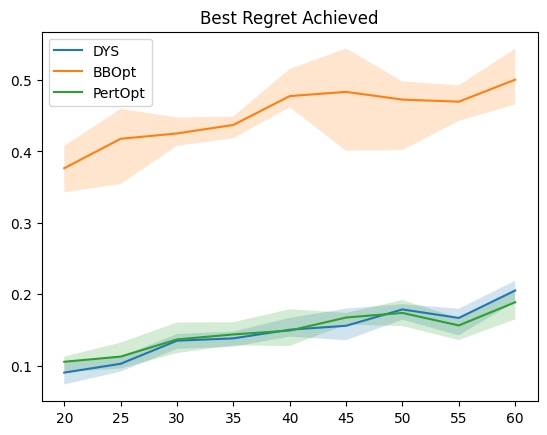

In [ ]:
import matplotlib.pyplot as plt

for idx, model_type in enumerate(models):
    plt.plot(item_values, results_test_loss_mean[idx,:], label=model_type)
    plt.fill_between(item_values, results_test_loss_min[idx,:], results_test_loss_max[idx,:], alpha=.2)

plt.title("Best Regret Achieved")
plt.legend()
plt.savefig('Knapsack_experiment_varying_num_items_regret_60.png')
plt.show()

    

In [ ]:
results_time_till_val_loss_mean = np.mean(results_time_till_val_loss, axis=2)
results_time_till_val_loss_min = np.min(results_time_till_val_loss, axis=2)
results_time_till_val_loss_max = np.max(results_time_till_val_loss, axis=2)

In [ ]:
# Dump to CSV for plotting
plotting_dir = "./plot_data/"
for idx, model_type in enumerate(models):
    np.savetxt(plotting_dir + 'results_time_till_best_val_loss' + model_type+'mean.csv',np.column_stack([item_values, results_time_till_val_loss_mean[idx,:]]), delimiter="," )
    np.savetxt(plotting_dir + 'results_time_till_best_val_loss' + model_type+'min.csv',np.column_stack([item_values, results_time_till_val_loss_min[idx,:]]), delimiter="," )
    np.savetxt(plotting_dir + 'results_time_till_best_val_loss' + model_type+'max.csv',np.column_stack([item_values, results_time_till_val_loss_max[idx,:]]), delimiter="," )
        

0 DYS
1 BBOpt
2 PertOpt


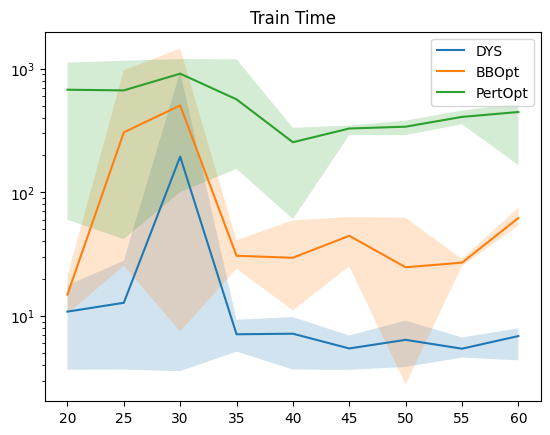

In [ ]:
for idx, model_type in enumerate(models):
    plt.semilogy(item_values, results_time_till_val_loss_mean[idx,:], label=model_type)
    plt.fill_between(item_values, results_time_till_val_loss_min[idx,:], results_time_till_val_loss_max[idx,:], alpha=.2)

plt.title("Train Time")
plt.legend()
plt.savefig('Knapsack_experiment_varying_num_items_train_time_60.pdf')
plt.show()

In [ ]:
results_dict = {"item_values": item_values,
                "models": models,
                "data_type": data_type,
                "results_test_loss": results_test_loss,
                "results_train_time": results_train_time,
                "results_time_till_val_loss": results_time_till_val_loss,
                }

In [ ]:
pkl.dump( results_dict, open( "results_x_knapsack.p", "wb" ) )